In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
mpl.rc('font', family='Malgun Gothic')

In [4]:
df_member = pd.read_csv('Member_Data.csv', encoding='EUC-KR')
df_product = pd.read_csv('Product_Data.csv')
df_sales = pd.read_csv('Sales_Data05.csv')

In [157]:
df_member.head(5)

,Unnamed: 0,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,1,18792000,정상회원,남,83,연결앱결제,NaN,False,강원도,강릉시
2,2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,3,18949760,정상회원,여,73,기업은행,NaN,NaN,강원도,홍천군
4,4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [7]:
df_product.head(5)

,제품번호,물품명,물품대분류,물품중분류,상품중량
0,100021V2_0,2단무늬컵,식기/편백,자기,1p
1,100022V2_1,7곡딸기롤과자,과자,스낵,100g/10개입
2,100023V2_2,7곡참식,식사대용,선식/생식,700g
3,100024V2_3,가리비,생물수산,패류/갑각류,1.5kg
4,100025V2_3,가리비,생물수산,패류/갑각류,1kg


In [55]:
df_sales.head(5)

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,사용 포인트 네이버,주문취소여부,주문시간,제품번호,배송시작일_dt,배송완료일_dt,배송소모일
0,1032097472,정상회원,1.0,7083,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100021783V2_1337,NaT,NaT,NaN
1,1032097472,정상회원,1.0,29865,2021-01-02,2021-01-02,2021-01-02,0,0,NaN,오후 12:60,100022137V2_1606,2021-01-02,2021-01-02,0.0
2,1032097472,정상회원,1.0,23164,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,100021452V2_1113,2021-01-02,2021-01-03,1.0
3,369152832,정상회원,1.0,16655,2021-01-02,2021-01-02,2021-01-03,0,0,NaN,오후 12:60,10002931V2_708,2021-01-02,2021-01-03,1.0
4,1032097472,정상회원,1.0,8423,2021-01-02,NaN,NaN,0,0,주문취소,오후 12:60,100022085V2_1559,NaT,NaT,NaN


- 배송지연율

In [5]:
# '배송시작일'과 '배송완료일' datetime 전환
df_sales['배송시작일_dt'] = pd.to_datetime(df_sales['배송시작일'])
df_sales['배송완료일_dt'] = pd.to_datetime(df_sales['배송완료일'])

# '배송소모일' 구하기
df_sales['배송소모일'] = (df_sales['배송완료일_dt'] - df_sales['배송시작일_dt']).dt.days

# 배송 지연 수
delivery_late_cond = df_sales['배송소모일'] >= 2
delivery_late_num = len(df_sales.loc[delivery_late_cond].index)

# 전체 배송 수
delivery_cond = pd.notna(df_sales['배송시작일'])
total_delivery_num = len(df_sales.loc[delivery_cond].index)

# 배송지연율
delivery_late_rate = delivery_late_num / total_delivery_num * 100
print(f"배송지연율은 {delivery_late_rate}% 이다.")

배송지연율은 15.226769321511712% 이다.


- 배송 지연을 겪은 고객 생성
    - df_delivery_late : 데이터 프레임 명
    - df_delivery_late['배송소모일'] : 배송까지 걸린 날짜를 담은 column명
    - df_delivery_late['배송지연'] : 배송지연 여부를 1(True), 0(False)로 나타낸 column명 ('배송소모일'이 2일 이상 일 시 '배송지연'으로 판단)
    - df_delivery_late['회원번호'] : 배송지연 경험을 겪은 회원들

In [7]:
def get_delay(x) :
    if x >= 2 :
        return 1
    else :
        return 0
        
# 데이터프레임 생성
df_delivery_late = df_sales[['회원번호', '주문일시', '주문취소여부', '배송소모일']]

# '배송소모일' 결측값 0으로 처리
df_delivery_late['배송소모일'] = df_delivery_late['배송소모일'].fillna(0)

# '배송지연' column 구하기
df_delivery_late['배송지연'] = df_delivery_late['배송소모일'].apply(get_delay)

# 배송지연을 겪은 고객만 남기기
customer_cond = df_delivery_late['배송지연'] == 1
df_delivery_late = df_delivery_late.loc[customer_cond]

df_delivery_late.head(5)

C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\1126338575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_late['배송소모일'] = df_delivery_late['배송소모일'].fillna(0)
C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\1126338575.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_late['배송지연'] = df_delivery_late['배송소모일'].apply(get_delay)


,회원번호,주문일시,주문취소여부,배송소모일,배송지연
10,438814080,2021-01-03,NaN,2.0,1
15,438814080,2021-01-03,NaN,2.0,1
16,438814080,2021-01-03,NaN,2.0,1
19,869925760,2021-01-04,NaN,2.0,1
26,673796672,2021-01-06,NaN,2.0,1


- 배송지연을 경험한 고객의 재구매율 계산
    - 재구매 : 주문취소를 제외한 주문일시 날짜가 2개 이상인 경우
    - (배송지연을 경험한 고객의 재구매율) = (배송지연을 경함한 고객 중 재구매한 고객 수) / (배송지연을 경험한 고객 수) * 100
    - 재구매O : 1(True)
    - 재구매X : 0(False)

In [11]:
# '주문일시' datetime 전환
df_delivery_late['주문일시'] = pd.to_datetime(df_delivery_late['주문일시'])

# 주문취소가 아닌 데이터만 df_order_delivery_late에 저장
order_cond = df_delivery_late['주문취소여부'] != '주문취소'
df_order_delivery_late = df_delivery_late.loc[order_cond]

# 가장 작은 '주문일시'와 가장 큰 '주문일시'를 확인하기
df_orderdate_delivery_late = df_order_delivery_late.pivot_table(index = '회원번호', values = '주문일시', aggfunc = ['min', 'max']).reset_index()

# 재구매율 구하기
df_orderdate_delivery_late['재구매기간'] = (df_orderdate_delivery_late['max']['주문일시'] - df_orderdate_delivery_late['min']['주문일시']).dt.days
repurchase_cond = df_orderdate_delivery_late['재구매기간'] >= 1
repurchase_customer_num = len(df_orderdate_delivery_late['재구매기간'].loc[repurchase_cond].index)
total_customer_num = len(df_delivery_late.index)
delivery_late_customer_repurchase_rate = repurchase_customer_num / total_customer_num * 100

print(f"배송지연을 경험한 고객의 재구매율은 {delivery_late_customer_repurchase_rate}% 이다.")

# min주문일시와 max주문일시가 같으면 재구매X, 다르면 재구매O
# '재구매' : '재구매기간'이 1 이상이면 1, 아니면 0
df_orderdate_delivery_late['재구매'] = (df_orderdate_delivery_late['재구매기간'] >= 1).astype(int)

배송지연을 경험한 고객의 재구매율은 7.021953908125315% 이다.


In [93]:
df_orderdate_delivery_late

,회원번호,min,max,재구매기간,재구매
,,주문일시,주문일시,,
0,18764160,2021-01-23,2021-10-06,256,1
1,18942336,2021-01-09,2021-10-20,284,1
2,19627200,2021-01-09,2021-10-18,282,1
3,19727424,2021-07-18,2021-10-09,83,1
4,19996544,2021-01-20,2021-10-31,284,1
...,...,...,...,...,...
9379,1644705536,2021-10-30,2021-10-30,0,0
9380,1644957952,2021-10-30,2021-10-30,0,0
9381,1670400000,2021-01-02,2021-10-31,302,1


In [115]:
#df_orderdate_delivery_late_temp = df_orderdate_delivery_late[['회원번호', '재구매']]
#df_orderdate_delivery_late_temp = df_orderdate_delivery_late_temp.reset_index()  # 다중 인덱스를 열로 변환
#df1 = df_orderdate_delivery_late_temp.merge(df_delivery_late_frequency, on='회원번호', how='inner')
df1 = df_delivery_late.pivot_table(index = '회원번호', values = '배송지연유무', aggfunc = 'sum').reset_index()
df1 # 배송지연유무 -> 배송지연빈도

# 배송지연빈도에 따른 재구매율 그래프 시각화

,회원번호,배송지연유무
0,18764160,8
1,18792000,0
2,18942336,9
3,18949760,0
4,19391488,0
...,...,...
12535,1644957952,1
12536,1645334720,0
12537,1670400000,210
12538,1670606016,4


- 배송지연을 경험한 고객의 고객이탈률
    - (배송지연을 경험한 고객의 고객이탈률) = (배송지연을 경험한 고객 중 고객이탈 수) / (배송지연을 경험한 고객 수) * 100

In [13]:
df_temp_delivery_late = df_delivery_late.pivot_table(index = '회원번호', values = '배송지연', aggfunc = 'sum').reset_index()
df_temp_member = df_member[['회원번호', '회원상태', '구독여부']]
df_DeliveLate_customer = df_temp_delivery_late.merge(df_temp_member, on='회원번호', how='inner')

# '정상회원'이 아닐 경우 '고객 이탈'로 가정
cond_leave = df_DeliveLate_customer['회원상태'] != "정상회원"

leave_num = len(df_DeliveLate_customer.loc[cond_leave].index) # 이탈 고객 수
member_num = len(df_DeliveLate_customer['회원상태']) # 전체 고객 수

# 고객 이탈률 계산
customer_leave_rate = leave_num / member_num * 100
print(f"배송지연을 경험한 고객의 이탈률은 {customer_leave_rate}% 이다.")

배송지연을 경험한 고객의 이탈률은 1.1082693947144073% 이다.


- 배송지연을 경험한 고객의 구독유무 계산

In [124]:
df_DeliveLate_customer['구독여부'].value_counts()

구독여부
False    6289
True     1325
Name: count, dtype: int64

- 가설검정

- 구매빈도, 배송지연빈도, 구독유무들을 input으로 받아 특정 고객의 이탈이나 유령고객이 될 확률을 계산하는 모델 생성.
    - 구매빈도 : 물품 구매를 n개 하였는지
    - 배송지연빈도 : 배송 지연이 n번 되었는지
    - 구독 유무 : True / False

- 회원별 구매빈도 추출

In [27]:
df_sales_frequency = df_sales.pivot_table(index = '회원번호', values = '구매수량', aggfunc = 'sum').reset_index()
df_sales_frequency = df_sales_frequency.rename(columns={'구매수량': '구매빈도'})
df_sales_frequency.head(3)

,회원번호,구매빈도
0,18764160,44.0
1,18792000,1.0
2,18942336,86.0


- 회원별 배송지연 빈도 추출

In [15]:
def get_delay(x) :
    if x >= 2 :
        return 1 #'True'
    else :
        return 0 #'False'

def get_delay_frequency(x) :
    if x >= 1 :
        return 1 #'True'
    else :
        return 0 #'False'

# '배송시작일'과 '배송완료일' datetime 전환
df_sales['배송시작일_dt'] = pd.to_datetime(df_sales['배송시작일'])
df_sales['배송완료일_dt'] = pd.to_datetime(df_sales['배송완료일'])

# '배송소모일' 구하기
df_sales['배송소모일'] = (df_sales['배송완료일_dt'] - df_sales['배송시작일_dt']).dt.days

# 데이터프레임 생성
df_delivery_late = df_sales[['회원번호', '주문일시', '배송소모일']]

# '배송소모일' 결측값 0으로 처리
df_delivery_late['배송소모일'] = df_delivery_late['배송소모일'].fillna(0)

# '배송지연' column 구하기
df_delivery_late['배송지연'] = df_delivery_late['배송소모일'].apply(get_delay)

# 회원별 주문 당 배송 지연 유무 확인
df_delivery_late = df_delivery_late.pivot_table(index = ['회원번호', '주문일시'], values = '배송지연', aggfunc = 'sum').reset_index()
df_delivery_late = df_delivery_late.rename(columns={'배송지연': '배송지연유무'})

# 회원별 배송지연 빈도 확인
df_delivery_late['배송지연유무'] = df_delivery_late['배송지연유무'].apply(get_delay_frequency)
df_delivery_late_frequency = df_delivery_late.pivot_table(index = '회원번호', values = '배송지연유무', aggfunc = 'sum').reset_index()
df_delivery_late_frequency = df_delivery_late_frequency.rename(columns={'배송지연유무': '배송지연빈도'})

df_delivery_late_frequency.head(3)

C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\3372552690.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_late['배송소모일'] = df_delivery_late['배송소모일'].fillna(0)
C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\3372552690.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery_late['배송지연'] = df_delivery_late['배송소모일'].apply(get_delay)


,회원번호,배송지연빈도
0,18764160,8
1,18792000,0
2,18942336,9


- 회원별 구독 유무 추출

In [17]:
def get_subscription(x) :
    if x == True :
        return 1
    else :
        return 0
        
df_subscription = df_member[['회원번호', '구독여부']]
df_subscription['구독여부'] = df_subscription['구독여부'].fillna('False')
df_subscription['구독여부'] = df_subscription['구독여부'].apply(get_subscription)
df_subscription = df_subscription.rename(columns={'구독여부': '구독유무'})
df_subscription.head(3)

C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\2727611584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscription['구독여부'] = df_subscription['구독여부'].fillna('False')
C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\2727611584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subscription['구독여부'] = df_subscription['구독여부'].apply(get_subscription)


,회원번호,구독유무
0,18764160,0
1,18792000,0
2,18942336,0


- 회원별 고객이탈 유무 구하기
    - True = 고객이탈O, False = 고객이탈X

In [57]:
def get_leave(x) :
    if x != '정상회원' :
        return 1 #'True'
    else :
        return 0 #'False'

df_customer_leave = df_member[['회원번호', '회원상태']]
df_customer_leave['고객이탈'] = df_customer_leave['회원상태'].apply(get_leave)
df_customer_leave = df_customer_leave[['회원번호', '고객이탈']]
df_customer_leave.head(3)

C:\Users\김태림\AppData\Local\Temp\ipykernel_13624\1412818455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_leave['고객이탈'] = df_customer_leave['회원상태'].apply(get_leave)


,회원번호,고객이탈
0,18764160,0
1,18792000,0
2,18942336,0


- 회원별 유령회원 유무 구하기
    - 유령회원 : 가장 최근 주문일 기준 n일 간 주문이 없는 고객 (n=60 가정)
    - True = 유령회원O, False = 유령회원X

In [129]:
def get_ghost(x) :
    if x >= 60 :
        return 100 #'True'
    else :
        return 0 #'False'

df_sales['주문일시_dt'] = pd.to_datetime(df_sales['주문일시'])
last_order_dt = df_sales['주문일시_dt'].max()
df_customer_last_order = df_sales.pivot_table(index = '회원번호', values = '주문일시_dt', aggfunc = 'max').reset_index()
df_customer_last_order['주문기간'] = (last_order_dt - df_customer_last_order['주문일시_dt']).dt.days

df_customer_last_order['유령회원'] = df_customer_last_order['주문기간'].apply(get_ghost)
df_customer_last_order = df_customer_last_order[['회원번호', '유령회원']]
df_customer_last_order.head(3)

,회원번호,유령회원
0,18764160,0
1,18792000,100
2,18942336,0


In [131]:
df_merged_member = df_sales_frequency.merge(df_delivery_late_frequency, on='회원번호', how='inner')
df_merged_member = df_merged_member.merge(df_subscription, on='회원번호', how='inner')
df_merged_member = df_merged_member.merge(df_customer_leave, on='회원번호', how='inner')
df_merged_member = df_merged_member.merge(df_customer_last_order, on='회원번호', how='inner')
df_merged_member.head(3)

,회원번호,구매빈도,배송지연빈도,구독유무,고객이탈,유령회원
0,18764160,44.0,8,0,0,0
1,18792000,1.0,0,0,0,100
2,18942336,86.0,9,0,0,0


<Axes: xlabel='배송지연빈도그룹', ylabel='유령회원'>

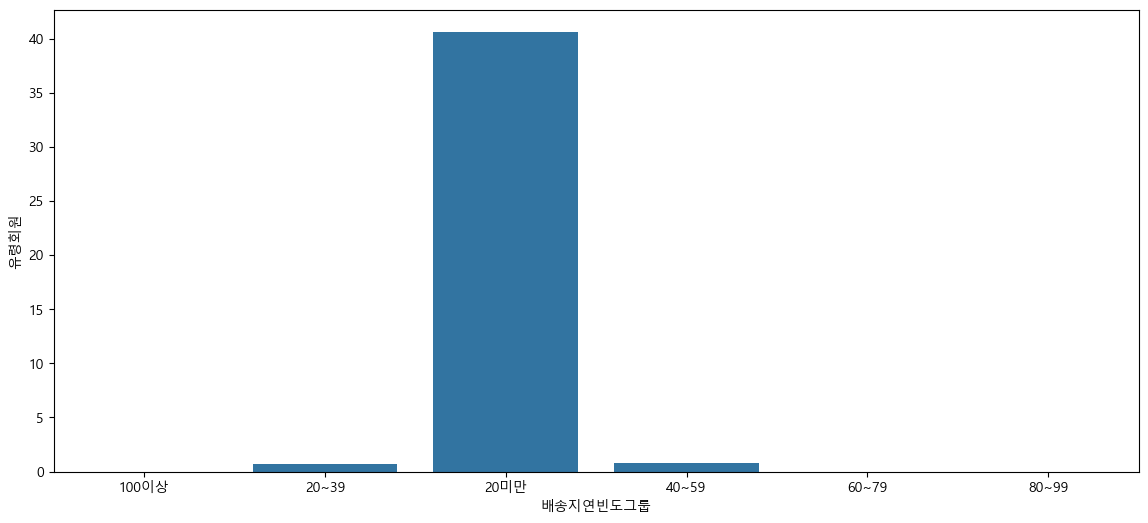

In [133]:
def get1(x) :
    if x < 20 :
        return '20미만'
    elif x >= 20 and x < 40 :
        return '20~39'
    elif x >= 40 and x < 60 :
        return '40~59'
    elif x >= 60 and x < 80 :
        return '60~79'
    elif x >= 80 and x < 100 :
        return '80~99'
    else :
        return '100이상'

df_merged_member['배송지연빈도그룹'] = df_merged_member['배송지연빈도'].apply(get1)

df1 = df_merged_member.pivot_table(index = '배송지연빈도그룹', values = '유령회원', aggfunc = 'mean').reset_index()
#df1['배송지연빈도그룹'] = df1['배송지연빈도'].apply(get1)

plt.figure(figsize=(14, 6))
sns.barplot(data = df1, x = '배송지연빈도그룹', y = '유령회원', errorbar = None)

<Axes: xlabel='배송지연빈도그룹', ylabel='유령회원'>

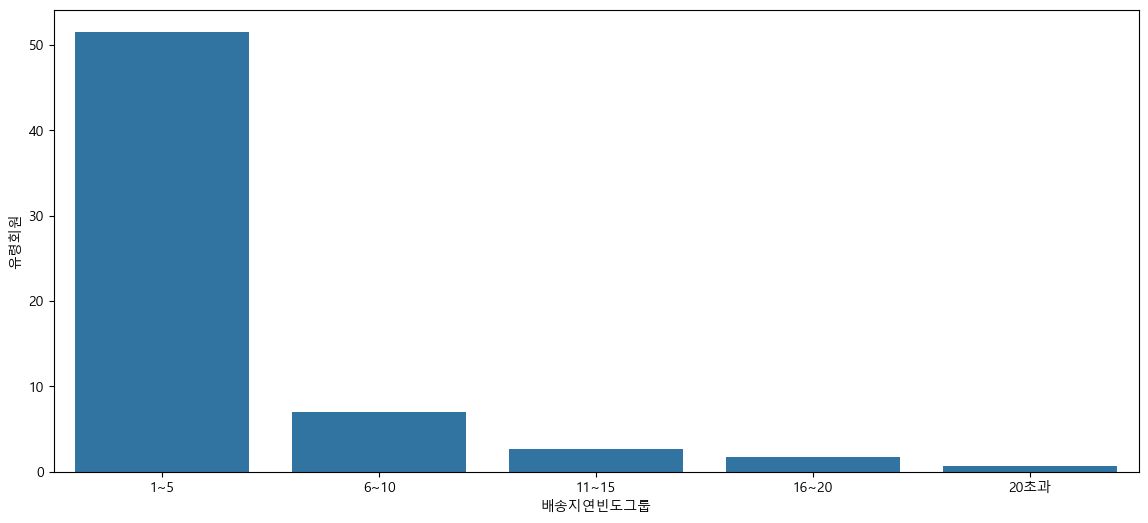

In [137]:
def get2(x) :
    if x <= 5 :
        return '1~5'
    elif x > 5 and x <= 10 :
        return '6~10'
    elif x > 10 and x <= 15 :
        return '11~15'
    elif x > 15 and x <= 20 :
        return '16~20'
    else :
        return '20초과'

def get3(x) :
    if x <= 5 :
        return 1
    elif x > 5 and x <= 10 :
        return 2
    elif x > 10 and x <= 15 :
        return 3
    elif x > 15 and x <= 20 :
        return 4
    else :
        return 5
        
df_merged_member['배송지연빈도그룹'] = df_merged_member['배송지연빈도'].apply(get2)
df_merged_member['배송지연빈도그룹(int)'] = df_merged_member['배송지연빈도'].apply(get3)
df1 = df_merged_member.pivot_table(index = ['배송지연빈도그룹', '배송지연빈도그룹(int)'], values = '유령회원',
                                   aggfunc = 'mean').reset_index().sort_values(by = '배송지연빈도그룹(int)')
plt.figure(figsize=(14, 6))
sns.barplot(data = df1, x = '배송지연빈도그룹', y = '유령회원', errorbar = None)

In [141]:
df1[['배송지연빈도그룹', '유령회원']]

,배송지연빈도그룹,유령회원
2,1~5,51.567433
4,6~10,7.007204
0,11~15,2.692778
1,16~20,1.750547
3,20초과,0.688863


- 구매빈도, 배송지연빈도, 구독유무들을 input으로 받아 특정 고객의 이탈이나 유령고객이 될 확률을 계산하는 모델 생성.
    - 구매빈도 : 물품 구매를 n개 하였는지
    - 배송지연빈도 : 배송 지연이 n번 되었는지
    - 구독 유무 : True / False

In [154]:
# 구매빈도, 배송지연빈도, 구독유무 입력
purchase_frequency = int(input("물품 구매를 몇 개 하였는지 입력 :"))
delivery_delay = int(input("배송 지연이 몇 번 되었는지 입력 :"))
subscription = input("구독 유무를 입력(True혹은False로) :")

물품 구매를 몇 개 하였는지 입력 : 10
배송 지연이 몇 번 되었는지 입력 : 2
구독 유무를 입력(True혹은False로) : True


- 고객이탈한 회원 정보(구매빈도, 배송지연빈도, 구독유무)를 바탕으로 고객이탈할 확률이 높은 회원번호를 출력

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_merged_member[["구매빈도", "배송지연빈도", "구독유무"]]
y_churn = df_merged_member["고객이탈"]
y_ghost = df_merged_member["유령회원"]
X_train, X_test, y_churn_train, y_churn_test = train_test_split(X, y_churn, test_size=0.2, random_state=42)
X_train, X_test, y_ghost_train, y_ghost_test = train_test_split(X, y_ghost, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_churn = LogisticRegression()
model_churn.fit(X_train_scaled, y_churn_train)
model_ghost = LogisticRegression()
model_ghost.fit(X_train_scaled, y_ghost_train)

y_churn_pred = model_churn.predict(X_test_scaled)
y_ghost_pred = model_ghost.predict(X_test_scaled)
churn_acc = accuracy_score(y_churn_test, y_churn_pred)
ghost_acc = accuracy_score(y_ghost_test, y_ghost_pred)
churn_report = classification_report(y_churn_test, y_churn_pred)
ghost_report = classification_report(y_ghost_test, y_ghost_pred)

churn_acc, ghost_acc
#churn_report, ghost_report

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.9824561403508771, 0.7484051036682615)

In [165]:
df_member['성별'].value_counts()

성별
여    11794
남      745
Name: count, dtype: int64

In [167]:
female_cond = df_member['성별'] == '여'
male_cond = df_member['성별'] == '남'

female_num = len(df_member.loc[female_cond].index)
male_num = len(df_member.loc[male_cond].index)
total_gender_num = female_num + male_num

female_percent = female_num / total_gender_num * 100
male_percent = male_num / total_gender_num * 100

print(f"여성비율은 {female_percent}% 이다.")
print(f"남성비율은 {male_percent}% 이다.")

여성비율은 94.05853736342611% 이다.
남성비율은 5.941462636573889% 이다.


In [169]:
df_gender = df_member[['회원번호', '성별']]

# 회원별 구매수량 구하기
df_purchase_num = df_sales.pivot_table(index = '회원번호', values = '구매수량', aggfunc = 'sum').reset_index()

# 병합
df_gender = df_gender.merge(df_purchase_num, on='회원번호', how='inner')

# 성별 별 평균 구매수량 구하기
df_result = df_gender.pivot_table(index = '성별', values = '구매수량', aggfunc = 'mean').reset_index()
df_result = df_result.rename(columns={'구매수량': '구매수량 평균'})
df_result

,성별,구매수량 평균
0,남,68.927517
1,여,63.173219
